In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import scipy.ndimage as ndimage
import math
from matplotlib import rcParams
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# from labellines import labelLine, labelLines

params = {'backend': 'ps',
          'font.size': 30,
          'font.family':'serif',
          'font.serif':['Helvetica'],
          'font.style': 'normal',
          'axes.labelsize': 30,
#           'text.fontsize': 30,
          'axes.linewidth': 4,
          'legend.fontsize': 12,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30,
          'text.usetex': True,
          'ps.usedistiller': 'xpdf'}

rcParams.update(params)

In [6]:
param_tag_prefix='202202201812'
param_tag_id=['0x005','0x010','0x025','0x050','0x100','0x250']
NLLData={}
for tid in param_tag_id:
    NLLData[tid]=pd.read_csv("../../RESULTS/SIGNALS/202202201812/Type-I/nll/AZH_NLL_Result_Benchmark_HA%s_HH%s.txt"%(tid,tid),sep='\s+')
    

In [15]:
# Define Frameworks
from scipy.interpolate import bisplrep, bisplev, interp2d, LinearNDInterpolator
from matplotlib import colors
def DrawCSUpperLimitAll(axc,tid):
    data=NLLData[tid]
    x=data['MHA']
    y=data['MHH']
    z=data['cs']*data['mu95']*1000 # fb
    # zmin=min(z)
    # zmax=max(z)
    # print(zmin,zmax)
    ftmp=LinearNDInterpolator(list(zip(x,y)),z)
    MHA=np.linspace(500,800,200)
    MHH=np.linspace(400,700,200)
    MHA,MHH=np.meshgrid(MHA,MHH)
    z=ftmp(MHA,MHH)
    cax=axc.scatter(MHA,MHH,c=z,vmin=8,vmax=40,rasterized=True)#,norm=colors.LogNorm())
#     cb=fig.colorbar(cax,ax=axc)
#     axc.set_xlabel(r'$m_A$ [GeV]')
#     axc.set_ylabel(r'$m_H$ [GeV]')
    axc.set_xticks([500,600,700,800])
    axc.set_yticks([400,500,600,700])
    axc.xaxis.set_minor_locator(MultipleLocator(20))
    axc.yaxis.set_minor_locator(MultipleLocator(20))
    axc.tick_params('both', length=12, width=4, which='major',direction='in',right=True,top=True)
    axc.tick_params('both', length=6, width=4, which='minor',direction='in',right=True,top=True)
#     cb.set_label(r'$\sigma$ [fb]')
#     cb.set_ticks(cbticks[tid])
    axc.text(500,680,r'$\sigma(pp\to ZH)\times{\rm BR}(H\to t\bar t)$')
    axc.text(500,650,r'95\% CL Upper Bounds')
    axc.text(500,620,r'$t_\beta = 1,\,c_{\beta-\alpha}=0$')
    axc.text(500,590,r'$\Gamma_{H,A}/m_{H,A} = %.1f\%%$'%(data['WRA'].iloc[0]*100))
    return cax

def DrawTogether(ax,fig):
    fig.subplots_adjust(wspace=0,hspace=0)
    for i in range(2):
        for j in range(3):
            axc=ax[i,j]
            tagid=i*3+j
            if i == 1:
                axc.set_xlabel(r'$m_A$ [GeV]')
            else:
                axc.set_xticklabels('')
            if j == 0:
                axc.set_ylabel(r'$m_H$ [GeV]')
            else:
                axc.set_yticklabels('')
            cax=DrawCSUpperLimitAll(axc,param_tag_id[tagid])
    cab=fig.colorbar(cax,ax=ax,location='right',shrink=1.0,pad=0.005,aspect=32)
    cab.set_label(r'$\sigma$ [fb]',fontsize=35)

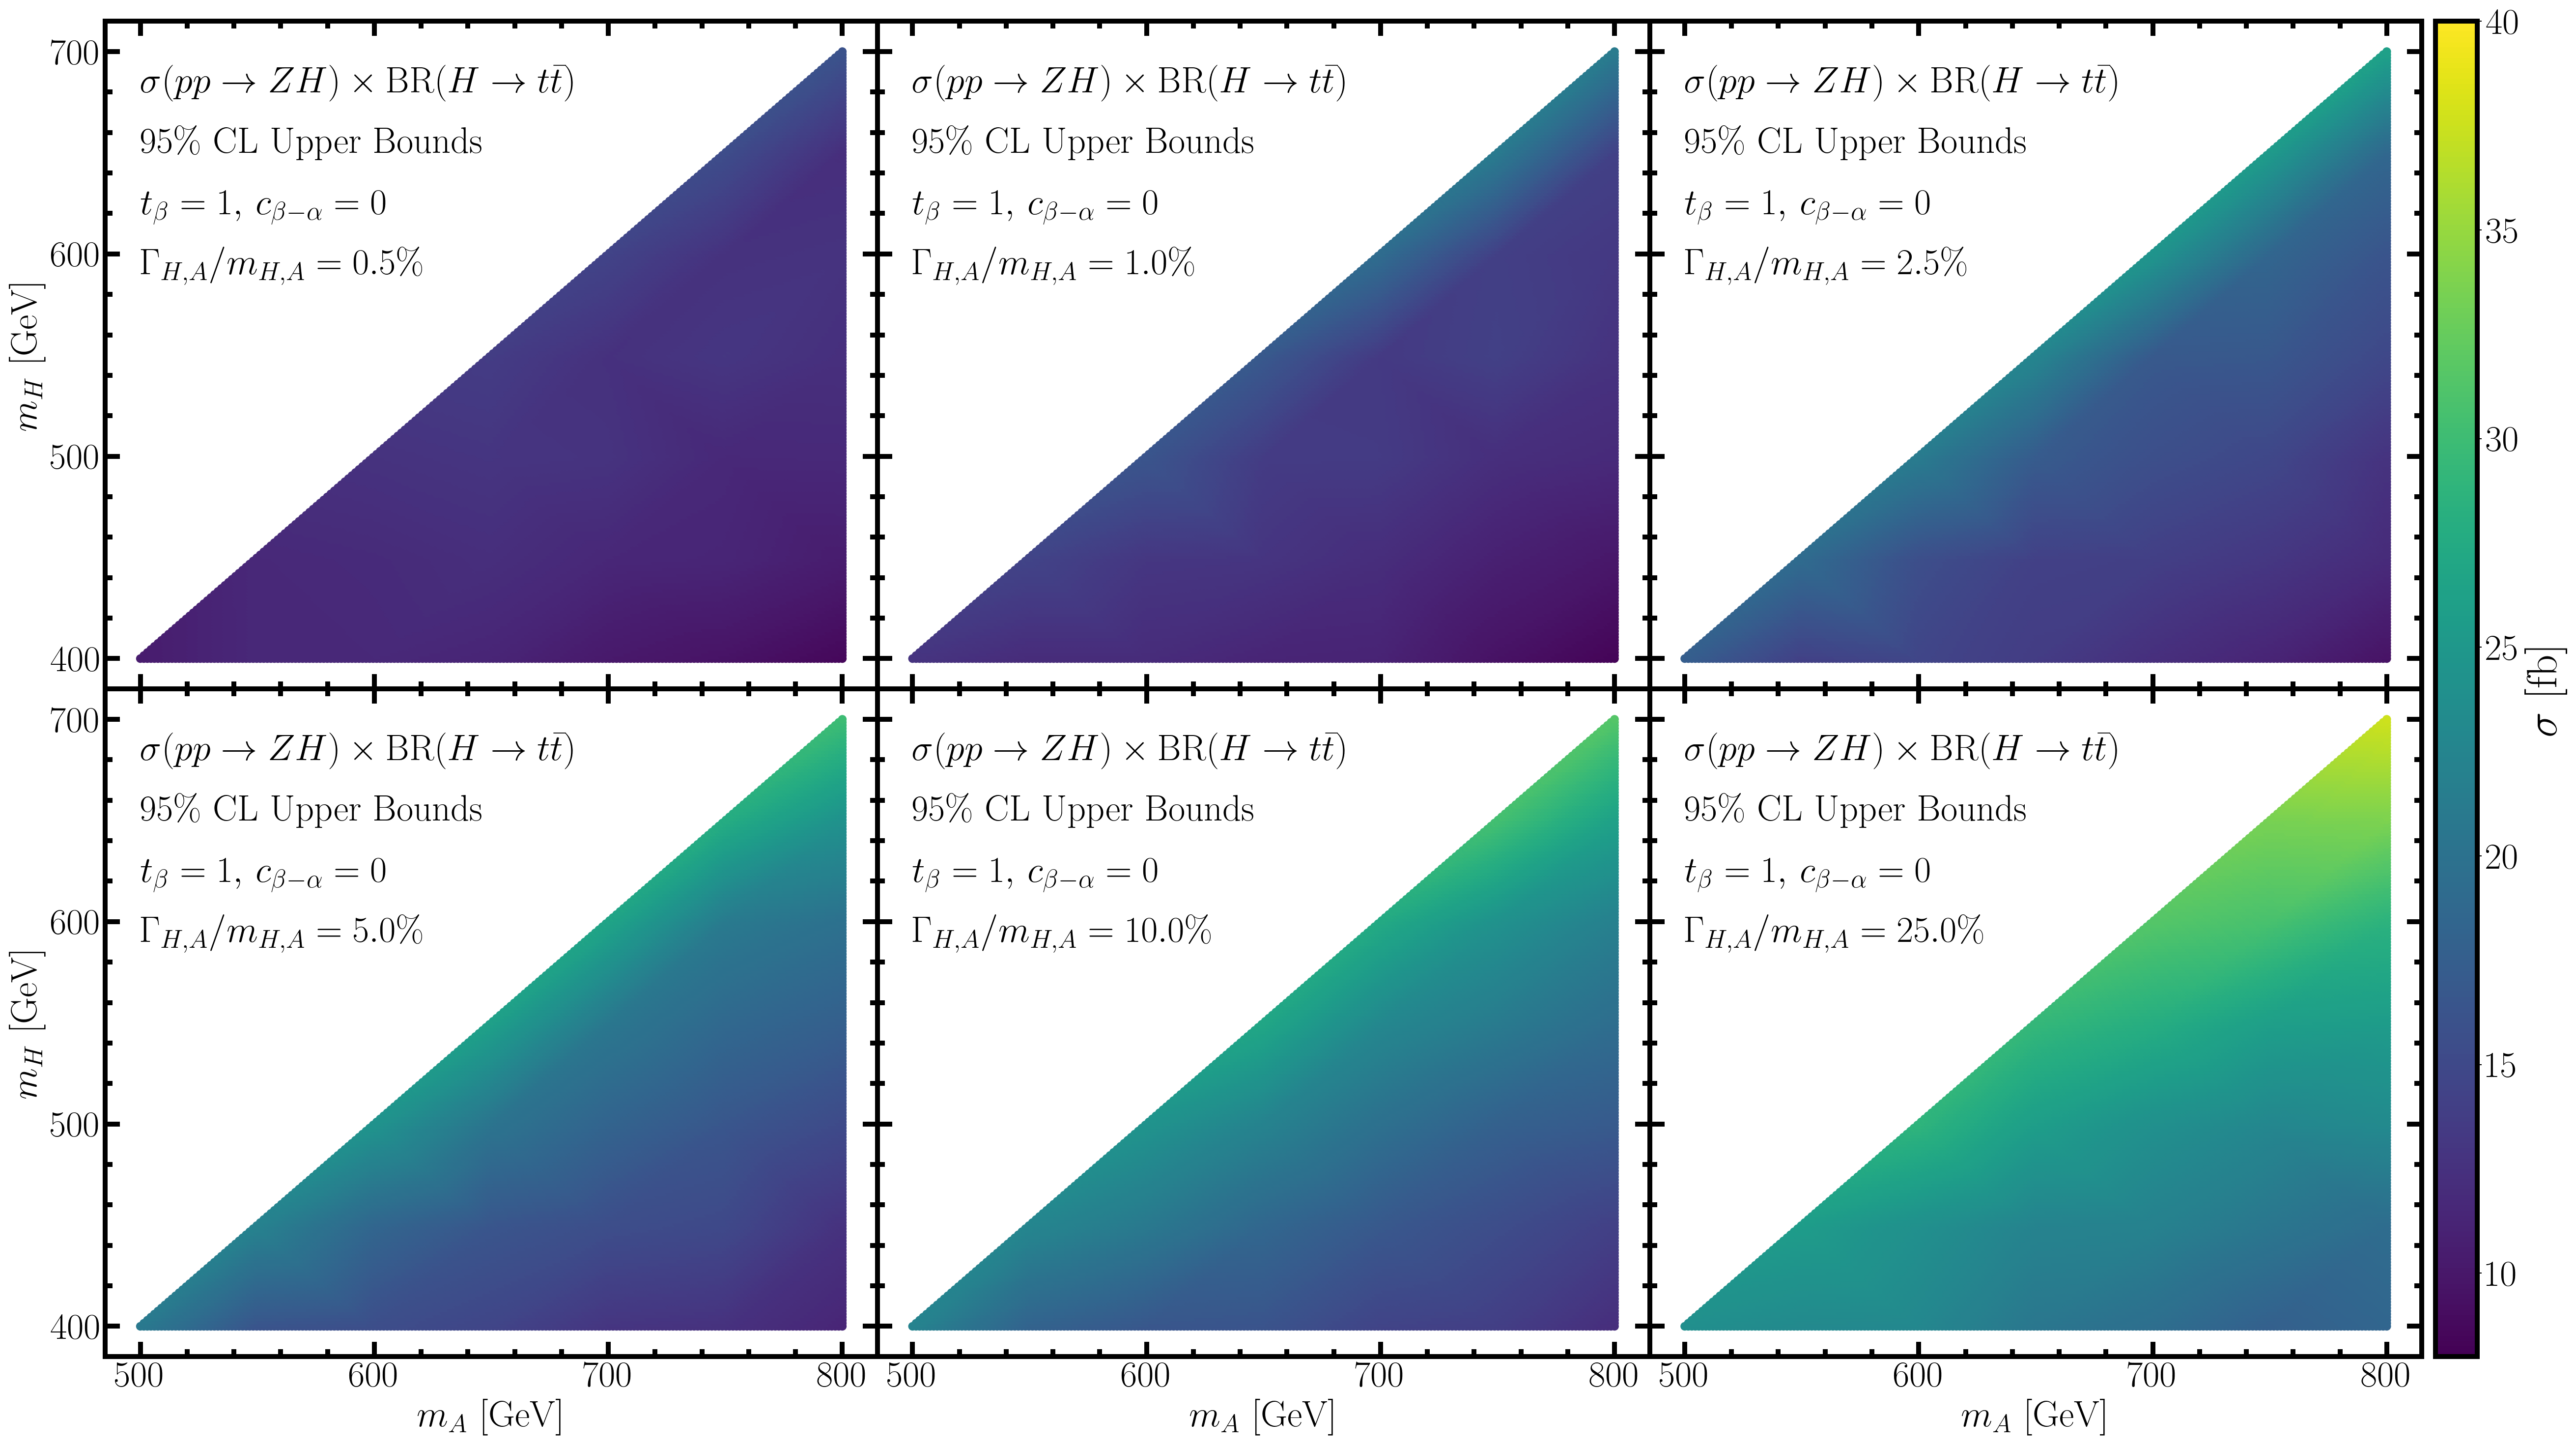

In [16]:
fig,ax=plt.subplots(2,3,figsize=(40,20),dpi=180,facecolor='white')
DrawTogether(ax,fig)
fig.savefig("signal_cs_limit_MHA_MHH.pdf",bbox_inches='tight',pad_inches=0.1)